In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('dataset.csv')
df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5


In [2]:
df.isnull().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [3]:
df.duplicated().sum()

np.int64(0)

In [4]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.isnull().sum()


id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [5]:
print("Shape of the data:",df.shape)
print("Column names:",df.columns)
print("Data types of each column:")
print(df.dtypes)
print()

print()
print(df.describe())


Shape of the data: (250000, 8)
Column names: Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp'],
      dtype='object')
Data types of each column:
id              int64
Sex            object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
dtype: object


                  id            Age         Height         Weight  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean   874999.500000      41.452464     174.725624      75.147712   
std     72168.927986      15.177769      12.822039      13.979513   
min    750000.000000      20.000000     127.000000      39.000000   
25%    812499.750000      28.000000     164.000000      63.000000   
50%    874999.500000      40.000000     174.000000      74.000000   
75%    937499.250000      52.000000     185.000000      87.000000   
max    999999.000000      79.000000     219.000000     126.000000   

In [6]:
df['Sex'].value_counts()


Sex
female    125281
male      124719
Name: count, dtype: int64

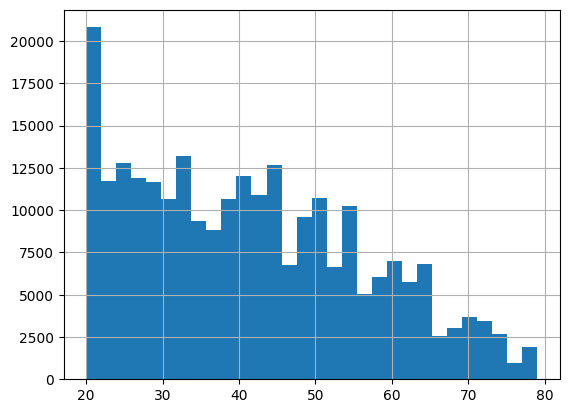

In [7]:
df['Age'].hist(bins=30)
plt.show()

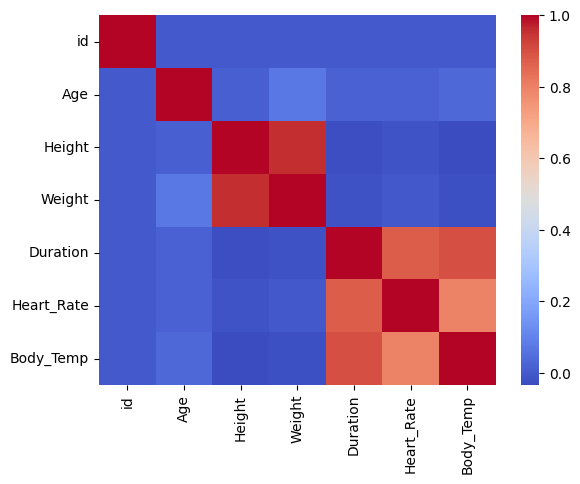

In [8]:
import seaborn as sns

sns.heatmap(df.drop('Sex', axis=1).corr(), cmap="coolwarm")
plt.show()

In [9]:
df['Calories'] = df['Duration'] * df['Heart_Rate'] * df['Weight'] * 0.0001
df.head()


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,750000,male,45,177.0,81.0,7.0,87.0,39.8,4.9329
1,750001,male,26,200.0,97.0,20.0,101.0,40.5,19.5940
2,750002,female,29,188.0,85.0,16.0,102.0,40.4,13.8720
3,750003,female,39,172.0,73.0,20.0,107.0,40.6,15.6220
4,750004,female,30,173.0,67.0,16.0,94.0,40.5,10.0768


In [10]:
df.groupby('Sex')['Heart_Rate'].mean()


Sex
female    95.415322
male      95.543133
Name: Heart_Rate, dtype: float64

<Axes: xlabel='Sex', ylabel='Heart_Rate'>

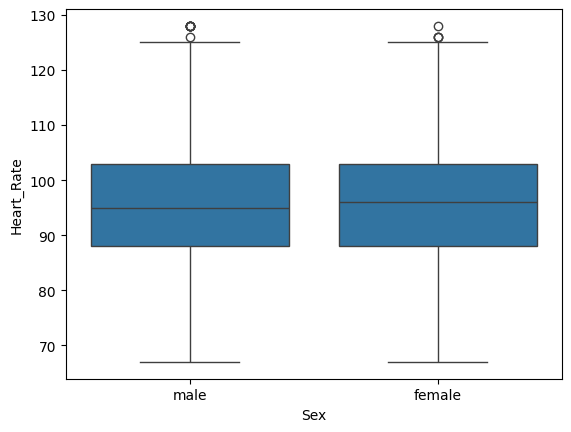

In [11]:
sns.boxplot(x='Sex', y='Heart_Rate', data=df)


In [12]:
df['Age'].mean()

np.float64(41.452464)

In [13]:
df['Good_heart_rate']=((df['Heart_Rate']>=60)&(df['Heart_Rate']<=100)).astype(int)
df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Good_heart_rate
0,750000,male,45,177.0,81.0,7.0,87.0,39.8,4.9329,1
1,750001,male,26,200.0,97.0,20.0,101.0,40.5,19.5940,0
2,750002,female,29,188.0,85.0,16.0,102.0,40.4,13.8720,0
3,750003,female,39,172.0,73.0,20.0,107.0,40.6,15.6220,0
4,750004,female,30,173.0,67.0,16.0,94.0,40.5,10.0768,1


In [14]:
young=(df['Age']<25).sum()
print("Number of young people:",young)

Number of young people: 38510


<Axes: xlabel='Age', ylabel='Height'>

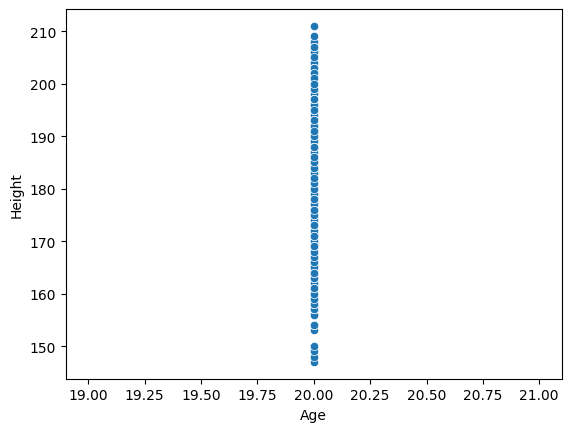

In [15]:
boys = df[(df['Sex'] == 'male') & (df['Age'] < 21)]
import seaborn as sns
sns.scatterplot(x='Age', y='Height', data=boys)


<Axes: xlabel='Age', ylabel='Height'>

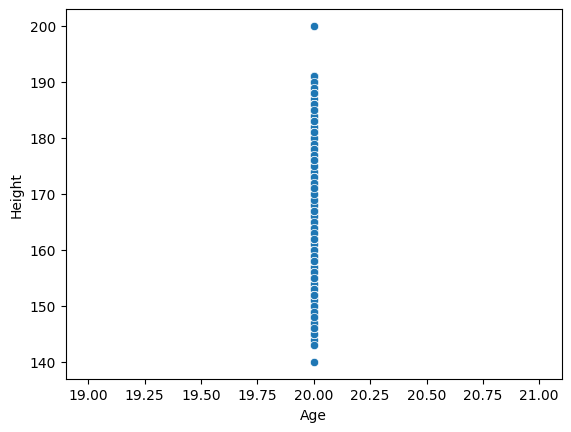

In [16]:
girls= df[(df['Sex'] == 'female') & (df['Age'] < 21)]
import seaborn as sns
sns.scatterplot(x='Age', y='Height', data=girls)


In [17]:
mean_dur=df['Duration'].mean()


df['Good_heart_rate'] = (((df['Duration'] > mean_dur) & (df['Heart_Rate'] > 100))|((df['Heart_Rate']>=60)&(df['Heart_Rate']<=100))).astype(int)

total=(df['Good_heart_rate']==1).sum()
print("Total good heart rate:",total)
print("Bad heart rate:",len(df)-total)
df.shape




Total good heart rate: 246467
Bad heart rate: 3533


(250000, 10)

In [18]:
import sys
print(sys.executable)


c:\Users\nithi\Automating eda\venv\python.exe


In [24]:
import dtale
dtale.show(df)